# Deep Learning week - Day 1 - Exercise 2


In this exercise, you will build your first Neural Network that will separate two classes.
Each data $X$ has only two coordinate $X = (x_1, x_2)$ and belongs to the class 0 or to the class 1. It is called the two moons dataset. 

As there is only two features, it can be represented on a graph, where the color corresponds to one of the two classes. Here is an example of such data : 

![Two moons](moons_example.png)



# Create data

Here, we will use the scikit-learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) that creates 2 moons that cannot be linearly separated. Each moon correspond to a class.

In [12]:
from sklearn.datasets import make_moons

### Data generation
X, y = make_moons(n_samples=300, noise=0.25, random_state=0)





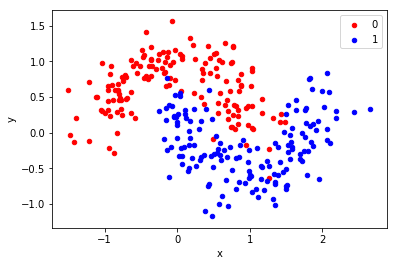

In [16]:
### This function allows to plot the two moons
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def plot_moons(X, y):
    df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
    colors = {0:'red', 1:'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')

    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    plt.show()

plot_moons(X, y)

❓ **Question** ❓ Play with the number of samples and the noise to see the effect on the data, by plotting the moons for different values

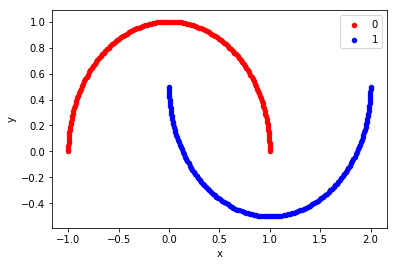

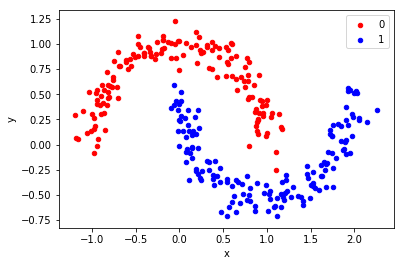

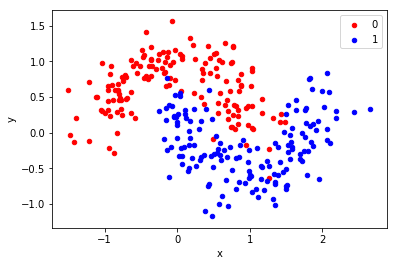

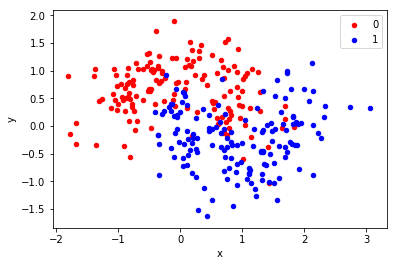

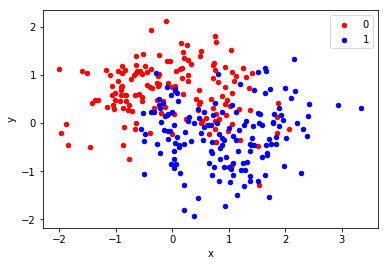

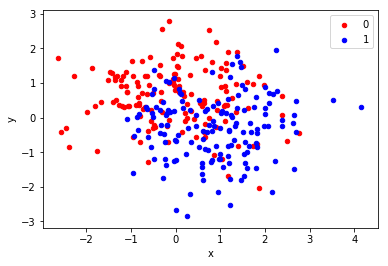

In [17]:
##############
### Answer ###
##############

for noise in [0., 0.1, 0.25, 0.4, 0.5, 0.8]:
    X, y = make_moons(n_samples=300, noise=noise, random_state=0)
    plot_moons(X, y)

❓ **Question** ❓ Draw 250 samples of the data with a noise equal to 0.20 (random state being 0) and split the initial dataset into a train and test set (size: 70/30%)

Remark : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

In [27]:
##############
### Answer ###
##############

X, y = make_moons(n_samples=250, noise=0.2, random_state=0)

n_train = int(0.7*len(X))

X_train, X_test = X[:n_train, :], X[n_train:, :]
y_train, y_test = y[:n_train], y[n_train:]

You will now define your first neural network.
The architecture of your model should be : 
- a first layer with 5 neurons, with activation function being `relu` and the correct input dimension
- a output layer suited to your 2-class classification problem.


❓ Question ❓ Complete the next function (in the `#TODO`) with the previous architecture

In [20]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [ ]:
def initialize_model():
    
    ### Model architecture
    ### To do 
    ### To do
    ### To do
    
    ### Model optimization : Optimizer, loss and metric    
    model.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    return model

model = initialize_model()

In [58]:
##############
### Answer ###
##############

def initialize_model():

    ### Model architecture
    model = models.Sequential()
    model.add(layers.Dense(2, input_dim=2, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    ### Model optimization : Optimizer, loss and metric    
    model.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    return model

model = initialize_model()

❗ **Remark** ❗ Briefly speaking, the compile tells your algorithm how to optimize the weights of your network once it will be fit onto real data. We will see it in depth tomorrow.

❓ **Question** ❓ Oh, by the way, how many parameters does the model have? Once your model is initialized, you can use the `summary` function that display the stack of layers, the shape of the output after each layer, and the number of parameters of each layer. Use this function to check that you have 21 parameters i.e. weights in your model.

In [59]:
##############
### Answer ###
##############

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


You are now ready to train your algorithm on some data :

In [65]:
model = initialize_model()

history = model.fit(X_train, y_train, 
                    epochs=30, 
                    batch_size=16, 
                    verbose=0)

### Do not change the epochs and batch size for now - we will see it tomorrow

❓ **Question** ❓ Try different verbose value to see what the model output during the 100 iterations

Use the following function to vizualise the loss value during the iteration

In [66]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

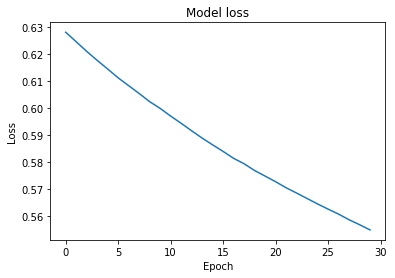

In [67]:
##############
### Answer ###
##############

plot_history(history)

The `evaluate` method of `model` evaluate your model : 

In [68]:
results = model.evaluate(X_train, y_train, verbose=0)

`results` is a list where the first element corresponds to the loss value. In the defined model, we use `binary_crossentropy` (see `model.compile(...)` above). This value is hard to interpreted, which is the reason why `model.compile` takes a `metrics` keyword to estimate other metrics. Those metrics are compute in the `evaluate` function and corresponds to the next values in the list.


❓ **Question** ❓ Based on the value of the `results`, what is the accuracy on the train set?

In [69]:
##############
### Answer ###
##############

results[1]*100

74.28571581840515

It is not a good idea to evaluate a model on the train set. Therefore, what is your accuracy on the test test?

In [70]:
##############
### Answer ###
##############

results = model.evaluate(X_test, y_test, verbose=0)
print(results[1])

0.73333335


❗ **Remark** ❗ The number of iterations has been selected quite arbitrary : it corresponds to the `epochs` keyword in the `model.fit(...)` method (that we will see in-depth tomorrow).

❓ **Question** ❓ Copy paste the function above to relaunch the model on 500 iterations (DO NOT FORGET TO CALL the `initialize_model` function, otherwise, your initial parameters are not random but those that you already learnt on the previous fit!!). Plot the history to see how the loss changed over the different epochs/iterations.

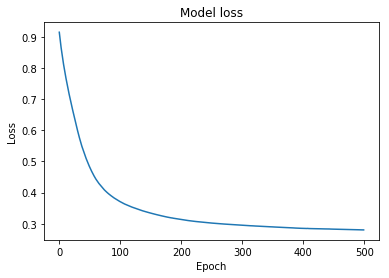

In [75]:
##############
### Answer ###
##############

model = initialize_model()

history = model.fit(X_train, y_train, 
                    epochs=500, 
                    batch_size=16, 
                    verbose=0)

plot_history(history)

❓ **Question** ❓ In this scenario, what is the accuracy on the test set?

In [76]:
##############
### Answer ###
##############

results = model.evaluate(X_train, y_train, verbose=0)

print(results[1]*100)

88.57142925262451


We have seen here that the more epochs, the better. This is not always true. So when to stop? The answer will be seen tomorrow

❓ **Question** ❓ Complete this new initialization of the model with a deeper architecture that includes : 

- a first layer with 10 neurons (activation being relu)
- a second layer with 5 neurons (activation being relu)
- an output layer suited for this problem


In [ ]:
##############
### Answer ###
##############

def initialize_model_2():

    ### Model architecture    
    # To complete
    # To complete
    # To complete
    # To complete
    
    ### Model optimization : Optimizer, loss and metric    
    model.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    return model

model = initialize_model_2()

In [77]:
##############
### Answer ###
##############

def initialize_model_2():
    
    ### Model architecture
    model = models.Sequential()
    model.add(layers.Dense(10, input_dim=2, activation='relu'))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    ### Model optimization : Optimized, loss and metric    
    model.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    return model

model = initialize_model_2()

❓ **Question** ❓ What is the number of parameters of your new model?

In [84]:
##############
### Answer ###
##############

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_45 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 6         
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


❓ **Question** ❓ Run your model on the previous data with 500 epochs and plot the loss afterwards

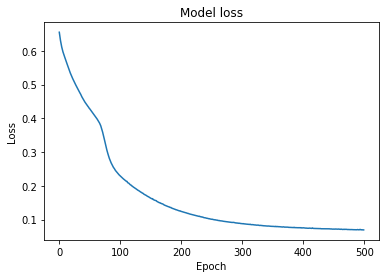

In [79]:
##############
### Answer ###
##############

model = initialize_model_2()

history = model.fit(X_train, y_train, 
                    epochs=500, 
                    batch_size=16, 
                    verbose=0)

plot_history(history)

❓ **Question** ❓ What is your accuracy on the test test?

In [83]:
##############
### Answer ###
##############

results = model.evaluate(X_test, y_test, verbose=0)

print(results[1]*100)

94.66666579246521


❓ **Open question** ❓ You can try different  number of layers, different number of neurons, ... feel free to test different architecture :)

❗ **Remark** ❗ Are you sure you want an accuracy of 100% with this amount of noise? Maybe your architecture is good enough as it is and getting 100% would only be overfitting ;)